# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [37]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [38]:
# Load Data 
data = pd.read_csv("assignment2_data.csv")
data.head()
data = data.drop([data.columns[0], data.columns[12]], axis=1)

## Data Description

In [39]:
# 결측치 체크
data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [40]:
# data type 체크 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [41]:
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [42]:
data.dropna("index", inplace = True)
data = data.reset_index(drop = True)
data.shape

(5975, 12)

In [43]:
# categorical
disc_col = []
for column in data.columns:
    if data[column].dtypes == object: 
        print(f"{column} : {data[column].unique()}")
        disc_col.append(column)
        print("====================================")

Name : ['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Volkswagen Polo IPL II 1.2 Petrol Highline'
 'Tata Bolt Revotron XT' 'Mahindra Xylo D4 BSIV']
Location : ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
Fuel_Type : ['CNG' 'Diesel' 'Petrol' 'LPG']
Transmission : ['Manual' 'Automatic']
Owner_Type : ['First' 'Second' 'Fourth & Above' 'Third']
Mileage : ['26.6 km/kg' '19.67 kmpl' '18.2 kmpl' '20.77 kmpl' '15.2 kmpl'
 '21.1 km/kg' '23.08 kmpl' '11.36 kmpl' '20.54 kmpl' '22.3 kmpl'
 '21.56 kmpl' '16.8 kmpl' '25.2 kmpl' '12.7 kmpl' '0.0 kmpl' '13.5 kmpl'
 '25.8 kmpl' '28.4 kmpl' '20.45 kmpl' '14.84 kmpl' '22.69 kmpl'
 '23.65 kmpl' '13.53 kmpl' '18.5 kmpl' '14.4 kmpl' '20.92 kmpl'
 '17.5 kmpl' '12.8 kmpl' '19.01 kmpl' '14.53 kmpl' '11.18 kmpl'
 '12.4 kmpl' '16.09 kmpl' '14.0 kmpl' '24.3 kmpl' '18.15 kmpl'
 '11.74 kmpl' '22.07 kmpl' '19.7 kmpl' '25.4 kmpl' '25.32 kmpl'
 '14.62 kmpl' '14.28 km

In [44]:
categoric_cols = [categoric for categoric in data.columns if data[categoric].dtypes == 'object']
categoric_cols

['Name',
 'Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power']

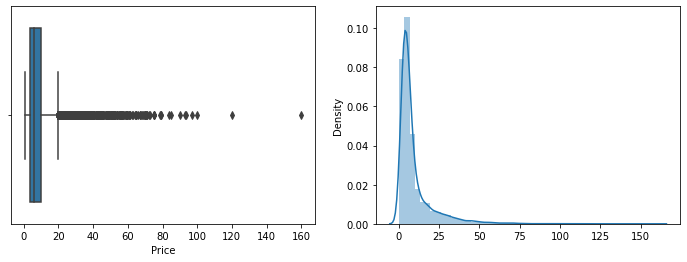

In [45]:
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12,4)

sns.boxplot(data["Price"], ax=ax1)
sns.distplot(data[["Price"]],ax=ax2)
#그래프가 매우 치우쳐져 있음. -> Density가 너무 낮은 값들은 제거하기

graph_colums = ["Price"]

for i in graph_colums: 
    for j in data[i].value_counts().index:     
        if (data[i].value_counts()[j]) < 30: 
              data = data.drop(data[(data[i] == j)].index)

<AxesSubplot:ylabel='Density'>

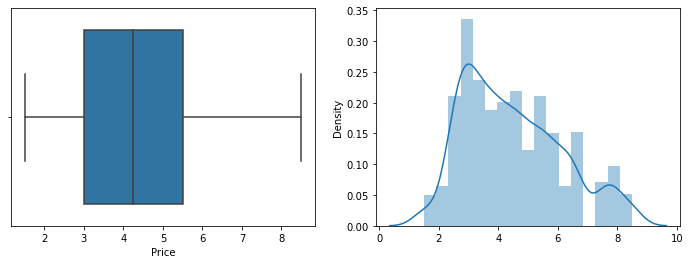

In [46]:
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12,4)

sns.boxplot(data["Price"], ax=ax1)
sns.distplot(data[["Price"]],ax=ax2)

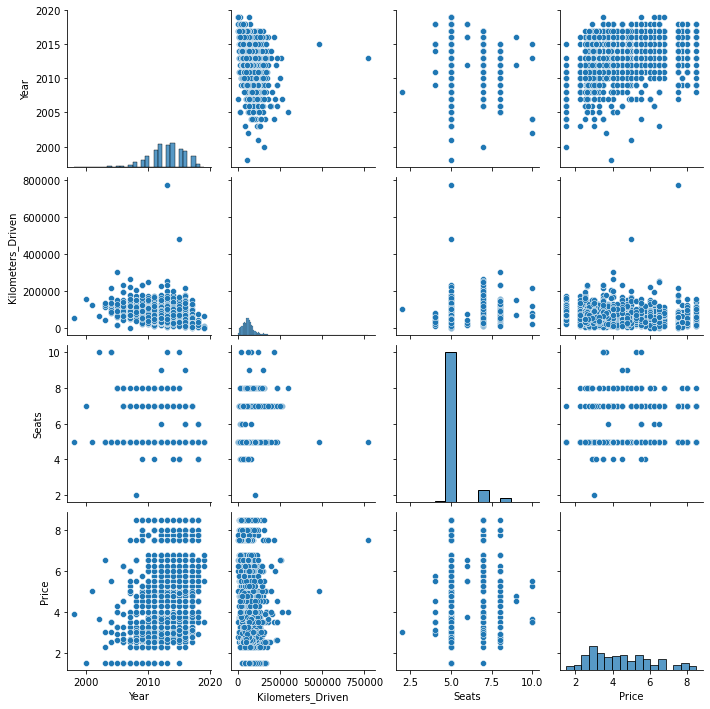

In [47]:
# 회귀분석 기본 가정 검토 : 선형성 
sns.pairplot(data)

##### seats의 경우 의심되지만 거의 대부분 선형성을 이루고 있다.

In [48]:
X = data.drop(["Price"], axis=1)
y = data.Price
y

2       4.50
3       6.00
6       3.50
25      4.25
26      4.25
        ... 
5970    4.75
5971    4.00
5972    2.90
5973    2.65
5974    2.50
Name: Price, Length: 1560, dtype: float64

In [49]:
# Matrix 계산을 위해 X와 y를 numpy 형태로 바꾸어줍니다. 
X = pd.DataFrame(X)
X.columns = ['Name','Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats']
X['Power']

2        88.7 bhp
3       88.76 bhp
6        63.1 bhp
25      116.3 bhp
26       63.1 bhp
          ...    
5970       74 bhp
5971       71 bhp
5972      112 bhp
5973     67.1 bhp
5974     57.6 bhp
Name: Power, Length: 1560, dtype: object

In [50]:
X #여기서 단위 모두 제거해서 대입
X['Mileage'] = X['Mileage'].str.split(' ').str[0].astype(float)
X['Engine'] = X['Engine'].str.split(' ').str[0].astype(float)
X['Power'] = X['Power'].str.split(' ').str[0]

In [51]:
y = y.drop(X[(X['Power'] == 'null')].index)
X = X.drop(X[(X['Power'] == 'null')].index)

X['Power'] = X['Power'].astype(float)

categoric_cols = [categoric for categoric in X.columns if X[categoric].dtypes == 'object']
categoric_cols
X = X.drop(categoric_cols, axis=1)
X

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
2,2011,46000,18.20,1199.0,88.70,5.0
3,2012,87000,20.77,1248.0,88.76,7.0
6,2013,86999,23.08,1461.0,63.10,5.0
25,2012,51920,16.80,1497.0,116.30,5.0
26,2012,54000,23.08,1461.0,63.10,5.0
...,...,...,...,...,...,...
5970,2014,27365,28.40,1248.0,74.00,5.0
5971,2015,100000,24.40,1120.0,71.00,5.0
5972,2012,55000,14.00,2498.0,112.00,8.0
5973,2013,46000,18.90,998.0,67.10,5.0


# correlation matrix 


In [52]:
X.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
Year,1.000000,-0.388417,0.516921,-0.473583,-0.378470,-0.155001
Kilometers_Driven,-0.388417,1.000000,-0.159141,0.363078,0.203893,0.205905
Mileage,0.516921,-0.159141,1.000000,-0.615124,-0.566005,-0.361399
Engine,-0.473583,0.363078,-0.615124,1.000000,0.776066,0.498190
Power,-0.378470,0.203893,-0.566005,0.776066,1.000000,0.150909
Seats,-0.155001,0.205905,-0.361399,0.498190,0.150909,1.000000


<AxesSubplot:>

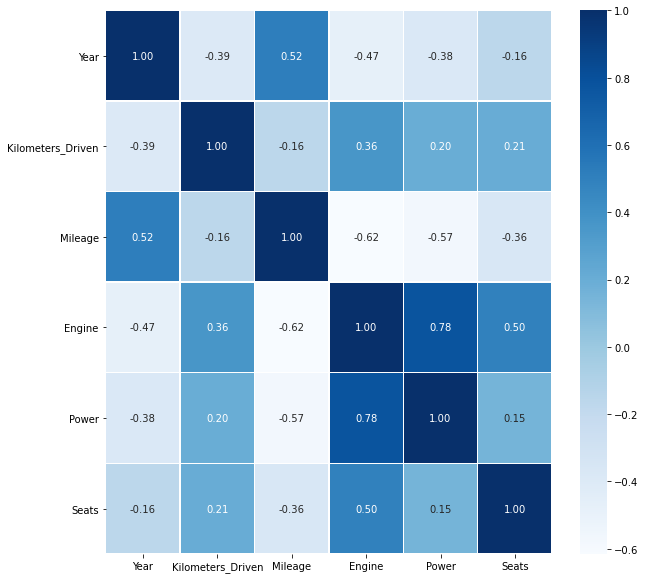

In [53]:
# heatmap : correlation matrix 시각화 
plt.figure(figsize=(10,10))
sns.heatmap(data = X.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

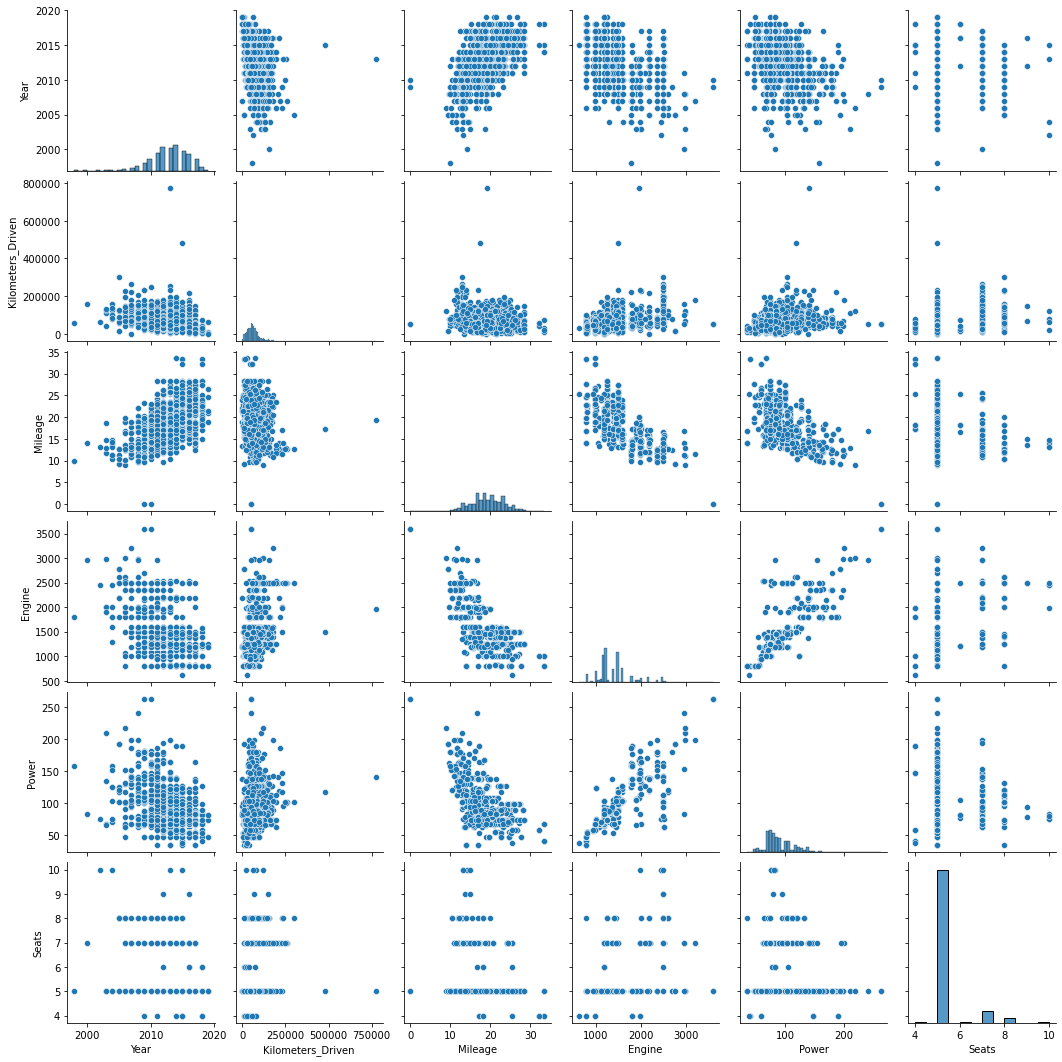

In [54]:
# 변수들 사이의 pairplot 
sns.pairplot(X)

#### Power 와 Engine의 상관관계는 매우높다. Milleage 와 Power의 상관관계도 높다. power과 Engine은 다중공선성을 의심해본다.

In [55]:
# VIF check 
X2 = X.drop(['Mileage'], axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif["features"] = X2.columns
vif.sort_values(["VIF Factor"], ascending=[False])



,VIF Factor,features
4,79.307293,Seats
0,62.247899,Year
2,58.954591,Engine
3,36.183745,Power
1,3.803107,Kilometers_Driven


In [56]:
X = X.drop(['Mileage'], axis=1)
y2 = y

## 3. target 변수와의 상관관계 

In [57]:
data.corr()['Price'].sort_values(ascending=False)

Price                1.000000
Year                 0.360416
Seats                0.175779
Kilometers_Driven   -0.064127
Name: Price, dtype: float64

- 여기서 상관관계가 지나치게 높게 나타나면 해당 변수의 영향력이 너무 지나치게 크다고 판단할 수 있는데,
현 상황에서는 괜찮아 보여요 !

# Modeling 

## 1. sklearn LinearRegression

In [58]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

from sklearn.metrics import mean_squared_error

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# 모델 불러옴
model = LinearRegression()

# train data에 fit시킴
model.fit(X_train, y_train)

LinearRegression()

In [60]:
# fit된 모델의 R-square
model.score(X_train, y_train)

0.5182930065034668

In [61]:
# predict
pred = model.predict(X_train)
mean_squared_error(y_train, pred)

1.3311798664986867

In [62]:
print(model.coef_) # 추정된 회귀계수 (intercept제외)
print(model.intercept_) # intercept

[ 3.81249505e-01 -6.52936052e-08  8.69158014e-04  2.70284782e-02
  2.15453252e-01]
-767.7986134635468


In [63]:
# test data R-square
model.score(X_test, y_test)

0.5389919683855497

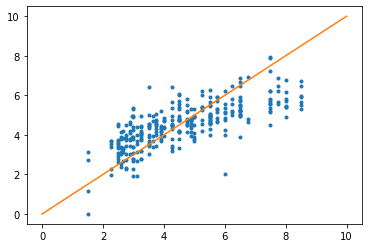

In [64]:
# 예측 vs 실제 데이터 plot
plt.plot(y_test, model.predict(X_test), '.')

# 예측과 실제가 비슷하면, 라인상에 분포함
x = np.linspace(0, 10, 10)
y = x
plt.plot(x, y)
plt.show()

In [65]:
ridge = Ridge(alpha=1.0) # alpha: 정규화의 정도를 결정해주는 하이퍼파라미터 (클수록 더 정규화)
ridge.fit(X_train, y_train)

Ridge()

In [66]:
# R-square
ridge.score(X_train,y_train)

0.5182929739873345

In [67]:
# Lasso R-square
lasso=Lasso(alpha=0.3)
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

0.5063330360404141

## 2. statsmodel OLS 

In [68]:
import statsmodels.api as sm

In [70]:
model = sm.OLS(y2, X2.astype(float))
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                              2925.
Date:                Wed, 09 Feb 2022   Prob (F-statistic):                        0.00
Time:                        15:43:40   Log-Likelihood:                         -2793.3
No. Observations:                1543   AIC:                                      5597.
Df Residuals:                    1538   BIC:                                      5623.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

### backward 

In [75]:
# p-value 값이 큰 변수 제거해보기 
X3 = X2.drop(["Engine"], axis=1)
y = X2.Engine

model = sm.OLS(y, X3)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Engine   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          2.230e+04
Date:                Wed, 09 Feb 2022   Prob (F-statistic):                        0.00
Time:                        15:45:36   Log-Likelihood:                         -10309.
No. Observations:                1543   AIC:                                  2.063e+04
Df Residuals:                    1539   BIC:                                  2.065e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

## 회귀분석 가정 검토 

In [76]:
import scipy.stats

In [77]:
# 모델을 통해 얻은 예측값 
pred = result.predict()

In [81]:
# 잔차 = 실제값 - 예측값 
residual = y - pred

In [82]:
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)

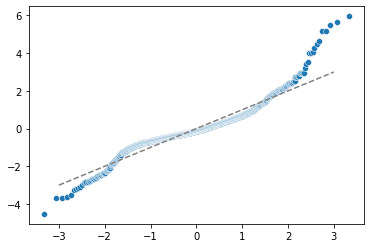

In [83]:
# 잔차의 정규성 
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

<AxesSubplot:>

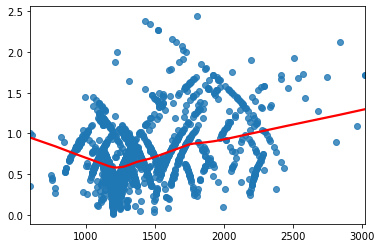

In [84]:
# 잔차의 등분산성 
sns.regplot(pred, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})